# Linear Regression in Keras

## 1.1  Linear Regression with one variable (simple linear regression)

<img src="simple_lin_reg.PNG">

#### Problem statement- To predict profits for a food truck in a city.
#### Given data - profit of the food truck in '$10,000s' based on populations of different cities in 10,000s

In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
print ('tensorflow_version: ',tf.__version__)
print ('keras_version: ',keras.__version__)

tensorflow_version:  1.4.0
keras_version:  2.0.4


In [3]:
path = os.getcwd() + '\ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
num_of_samples = data.shape[0]
print ('Num of samples: ', num_of_samples)

Num of samples:  97


In [7]:
data_x,data_y = data['Population'],data['Profit']


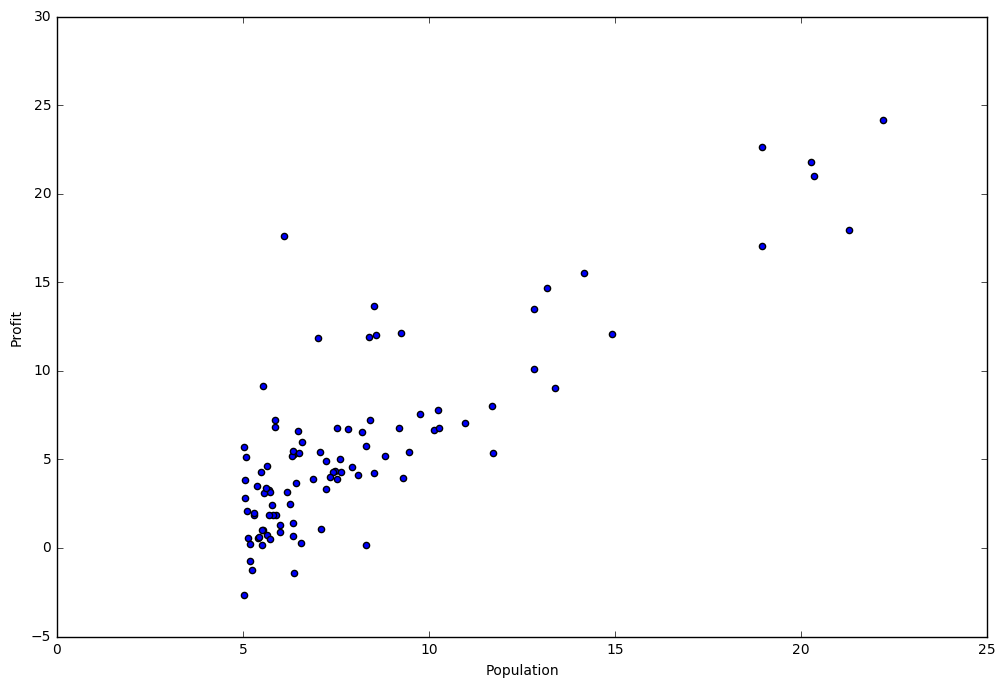

In [8]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

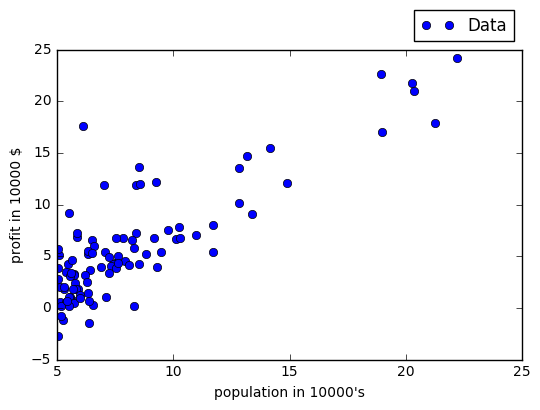

In [9]:
plt.plot(data_x,data_y,'o')
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [10]:
print (data_x[0:1].shape,data_y[0:1].shape)

(1,) (1,)


In [11]:
print (data_x[0:5],data_y[0:5])

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64 0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


#### simple linear reg model, a = w.x  + b

### creating Sequential model in keras

In [12]:
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mse'])
#model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['mse'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


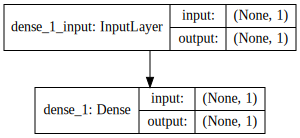

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [16]:
# creating model using Functional API
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model_2 = Model(inputs=inputs,outputs=preds)
#sgd=keras.optimizers.SGD()
model_2.compile(optimizer='adam' ,loss='mse',metrics=['mse'])

In [17]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


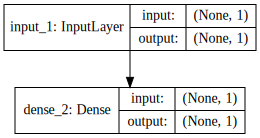

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_2,show_shapes=True).create(prog='dot', format='svg'))

In [19]:
tensorboard = TensorBoard(log_dir="./keras_logs_simple_lin_reg")
# Train the model
hist = model.fit(data_x,data_y, batch_size=1, epochs=100, shuffle=False,callbacks=[tensorboard])

Epoch 1/100
97/97 [==============================] - 0s - loss: 60.1208 - mean_squared_error: 60.1208       
Epoch 2/100
97/97 [==============================] - 0s - loss: 53.2567 - mean_squared_error: 53.2567       
Epoch 3/100
97/97 [==============================] - 0s - loss: 47.1359 - mean_squared_error: 47.1359       
Epoch 4/1

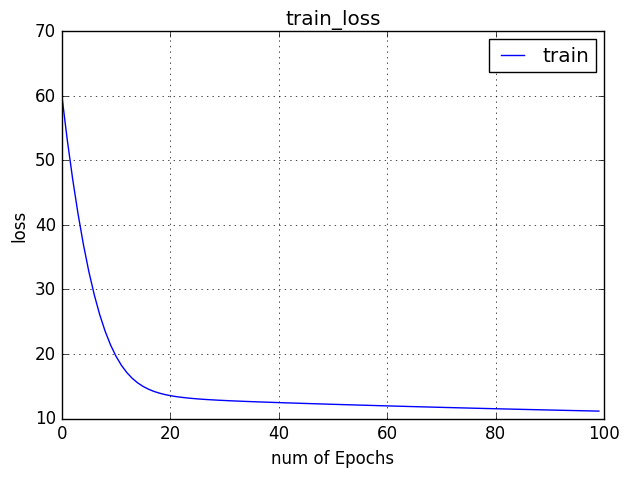

In [20]:
# visualizing losses and accuracy
num_epoch = 100
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
#train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


#### Evaluating the model

In [22]:
x_test = np.array(data_x)
y_test = np.array(data_y)
score = model.evaluate(x_test, y_test)
print('Test Score:', score)

32/97 [========>.....................] - ETA: 0sTest Score: [11.2188970723103, 11.2188970723103]


#### Predicting the output of test sample

In [24]:
#test 
x_test = np.array(data_x[0:1])
y_test = np.array(data_y[0:1])
y_test_predicted=model.predict(x_test)
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [[ 4.21171188]]
true_value:  [ 17.592]


In [25]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted=model.predict(x_test)
#y_test_predicted

#### Getting the trained parameters

In [26]:
#model.get_weights()
#params=model.get_weights()
# for sequential model
params=model.layers[0].get_weights()
params

# if you defined your model using functional API
#params=model_2.layers[1].get_weights()

[array([[ 0.80214304]], dtype=float32), array([-0.68946195], dtype=float32)]

In [27]:
w=params[0][0]
b=params[1]
y_test_predicted_2=x_test*w+b

#### Plotting the trained model

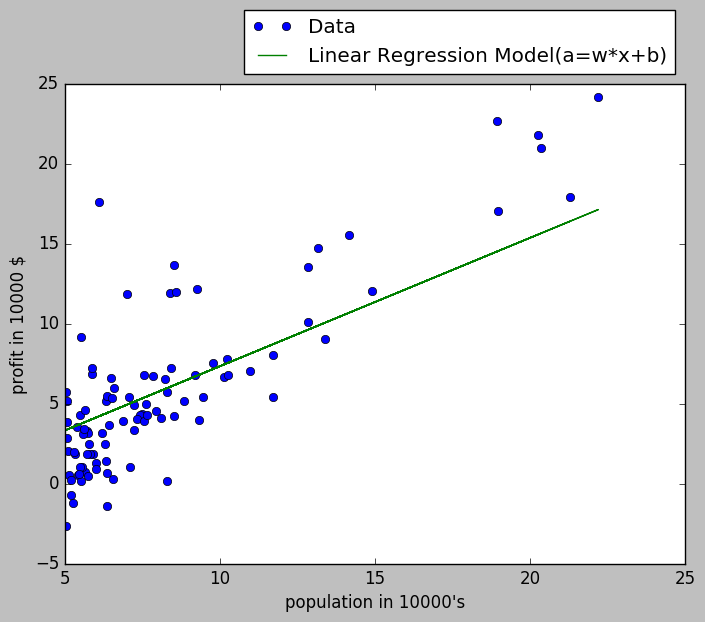

In [29]:
plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data', 'Linear Regression Model(a=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

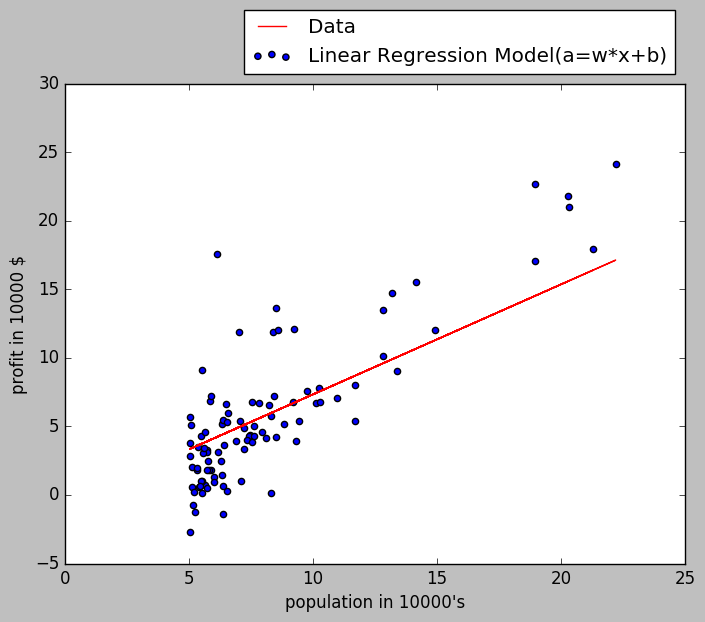

In [30]:
plt.scatter(x_test,y_test,marker="o")
plt.plot(x_test,y_test_predicted,"r-")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data', 'Linear Regression Model(a=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

#### saving the model

In [31]:
model.save('simple_lin_reg_model.h5')


#### Loading the model

In [32]:
from keras.models import load_model
loaded_model=load_model('simple_lin_reg_model.h5')
loaded_model.get_weights()

[array([[ 0.80214304]], dtype=float32), array([-0.68946195], dtype=float32)]

#### Saving the model graph

In [33]:
from keras.utils import plot_model
plot_model(model, to_file='simple_lin_reg_model.png',show_shapes=True)